In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt # for plotting graphs
import seaborn as sns# statistical data visualization library
from functools import cmp_to_key

from sklearn import metrics
import math
import tensorflow as tf
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)

In [2]:
# load the train.csv file
df = pd.read_csv('train.csv')
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [3]:
df_test = pd.read_csv('test.csv')
df_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [4]:
print('total fields = %d' % (len(df.keys())))
print('fields = %s' % (df.keys()))

total fields = 81
fields = Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
     

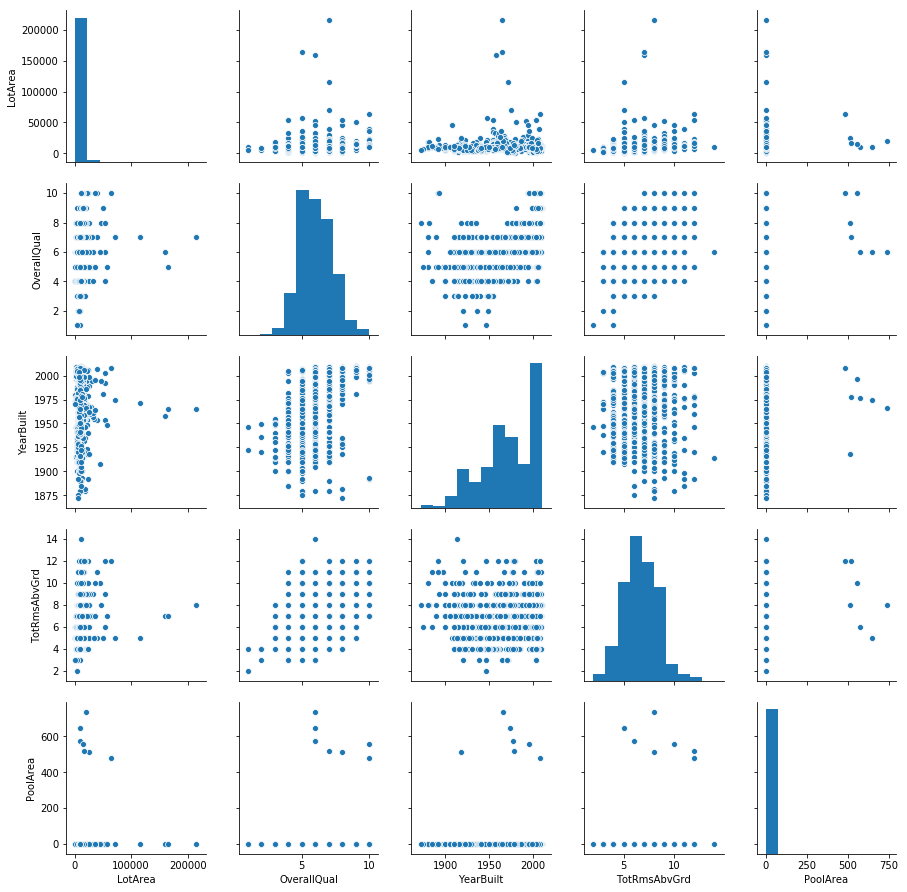

In [5]:
#seaborn pair plot
sns.pairplot(df[['LotArea', 'OverallQual', 'YearBuilt', 'TotRmsAbvGrd', 'Neighborhood', 'SaleCondition', 'PoolArea']])

In [6]:
df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


Check heatmap:

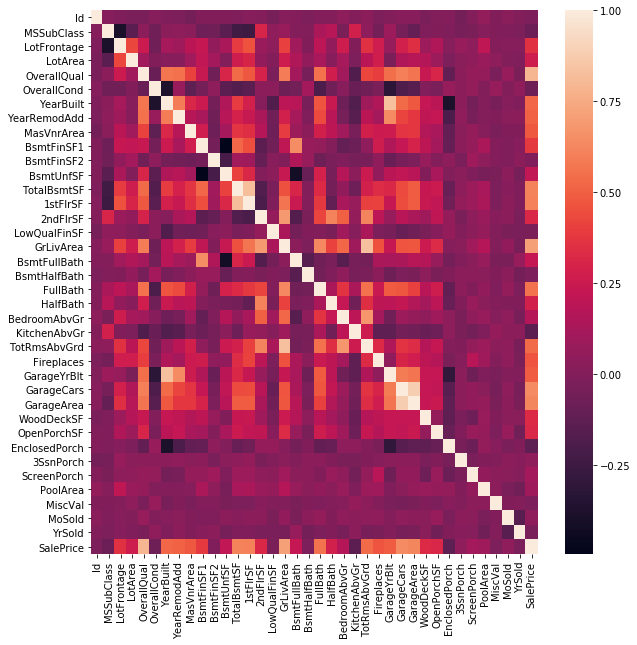

In [7]:
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr())

/home/jun_inthebay/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


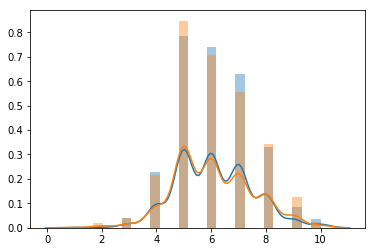

In [18]:
sns.distplot(df[['OverallQual']])
sns.distplot(df_test[['OverallQual']])

In [9]:
def min2(l, default = 0.0):
    if len(l) == 0:
        return default
    else:
        return min(l)

def max2(l, default = 0.0):
    if len(l) == 0:
        return default
    else:
        return max(l)

def avg2(l, default = 0.0):
    if len(l) == 0:
        return default
    else:
        return float(sum(l)) / float(len(l))

def std2(l, default = 0.0):
    if len(l) == 0:
        return default
    else:
        return np.std(l)

def histogram_for_non_numerical_series(s):
    d = {}
    for v in s:
        d[v] = d.get(v, 0) + 1
    bin_s_label = list(d.keys())
    bin_s_label.sort()
    bin_s = list(range(0, len(bin_s_label)))
    hist_s = [d[v] for v in bin_s_label]
    bin_s.append(len(bin_s))
    bin_s_label.insert(0, '_')
    return (hist_s, bin_s, bin_s_label)
    
def plot_hist_with_target3(plt, df, feature, target, histogram_bins = 10):
    # reference:
    #    https://stackoverflow.com/questions/33328774/box-plot-with-min-max-average-and-standard-deviation
    #    https://matplotlib.org/gallery/api/two_scales.html 
    #    https://matplotlib.org/1.2.1/examples/pylab_examples/errorbar_demo.html
    #    https://matplotlib.org/2.0.0/examples/color/named_colors.html
    #    https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xticks.html
    title = feature
    plt.title(title)
    s = df[feature]
    t = df[target]
    t_max = max(t)
    # get histogram of the feature
    bin_s_label = None
    # fillna with 0.0 or '_N/A_'
    na_cnt = sum(s.isna())
    if na_cnt > 0:
        if True in [type(_) == str for _ in s]:
            print('found %d na in string field %s' % (na_cnt, feature))
            s = s.fillna('_N/A_')
        else:
            print('found %d na in numerical field %s' % (na_cnt, feature))
            s = s.fillna(-1.0)
    try:
        hist_s, bin_s = np.histogram(s, bins = histogram_bins)
    except Exception as e:
        # print('ERROR: failed to draw histogram for %s: %s: %s' % (name, type(e).__name__, str(e)))
        hist_s, bin_s, bin_s_label = histogram_for_non_numerical_series(s)
        # return
    # histogram of target by distribution of feature
    hist_t_by_s_cnt = [0] * (len(bin_s) - 1)
    hist_t_by_s = [] 
    for i in range(0, (len(bin_s) - 1)):
        hist_t_by_s.append([])
    # get target histogram for numerical feature
    if bin_s_label is None:
        for (sv, tv) in zip(s, t):
            pos = 0
            for i in range(0, len(bin_s) - 1):
                if sv >= bin_s[i]:
                    pos = i
            hist_t_by_s_cnt[pos] += 1
            hist_t_by_s[pos].append(tv)
    else:
        for (sv, tv) in zip(s, t):
            pos = bin_s_label.index(sv) - 1
            hist_t_by_s_cnt[pos] += 1
            hist_t_by_s[pos].append(tv)
        # count avg, to re-sort bin_s and bin_s_label by avg
        hist_t_by_s_avg = [float(avg2(n)) for n in hist_t_by_s]
        # hist_t_by_s_std = [float(std2(n)) for n in hist_t_by_s]
        # hist_t_by_s_adj = list(np.array(hist_t_by_s_avg) + np.array(hist_t_by_s_std))
        hist_t_by_s_adj = hist_t_by_s_avg
        # print('before sort:\n%s\n%s\n%s' % (bin_s, bin_s_label, hist_t_by_s_adj))
        bin_hist_label = list(zip(bin_s[1:], hist_t_by_s_adj, bin_s_label[1:]))
        bin_hist_label.sort(key = cmp_to_key(lambda x, y: x[1] - y[1]))
        (bin_s, hist_t_by_s_adj, bin_s_label) = zip(*bin_hist_label)
        bin_s = list(bin_s)
        hist_t_by_s_adj = list(hist_t_by_s_adj)
        bin_s_label = list(bin_s_label)
        bin_s.insert(0, 0)
        bin_s_label.insert(0, '_')
        # re-arrange hist_s and hist_t_by_s
        hist_s_new = []
        hist_t_by_s_new = []
        for i in bin_s[1:]:
            hist_s_new.append(hist_s[i - 1])
            hist_t_by_s_new.append(hist_t_by_s[i - 1])
        hist_s = hist_s_new
        hist_t_by_s = hist_t_by_s_new
        # print('after sort:\n%s\n%s\n%s' % (bin_s, bin_s_label, hist_t_by_s_adj))
        # reset bin_s's ordering
        bin_s.sort()
    hist_s = list(hist_s)
    if len(hist_s) < len(bin_s):
        hist_s.insert(0, 0.0)
    hist_s_max = max(hist_s)
    plt.fill_between(bin_s, hist_s, step = 'mid', alpha = 0.5, label = feature)
    if bin_s_label is not None:
        plt.xticks(bin_s, bin_s_label)
    plt.xticks(rotation = 90)
    # just to show legend for ax2
    # plt.errorbar([], [], yerr = [], fmt = 'ok', lw = 3, ecolor = 'sienna', mfc = 'sienna', label = target)
    plt.legend(loc = 'upper right')
    hist_t_by_s = list(hist_t_by_s)
    if len(hist_t_by_s) < len(bin_s):
        hist_t_by_s.insert(0, [0.0])
    hist_t_by_s_min = [float(min2(n)) for n in hist_t_by_s]
    hist_t_by_s_max = [float(max2(n)) for n in hist_t_by_s]
    hist_t_by_s_avg = [float(avg2(n)) for n in hist_t_by_s]
    hist_t_by_s_std = [float(std2(n)) for n in hist_t_by_s]
    hist_t_by_s_err = [np.array(hist_t_by_s_avg) - np.array(hist_t_by_s_min), np.array(hist_t_by_s_max) - np.array(hist_t_by_s_avg)]
    plt.xlabel(feature)
    plt.ylabel('Count')
    ax2 = plt.twinx()
    ax2.grid(False)
    ax2.errorbar(bin_s, hist_t_by_s_avg, yerr = hist_t_by_s_err, fmt='.k', lw = 1, ecolor = 'sienna')
    ax2.errorbar(bin_s, hist_t_by_s_avg, yerr = hist_t_by_s_std, fmt='ok', lw = 3, ecolor = 'sienna', mfc = 'sienna', label = target)
    ax2.set_ylabel(target)
    plt.legend(loc = 'upper left')
    plt.tight_layout()

In [10]:
numerical_fields = [
    'OverallQual', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
    '2ndFlrSF', 'GrLivArea', 'FullBath', 'GarageCars', 'GarageArea', 'MSSubClass'
]

categorical_fields = [
    'Neighborhood'
]

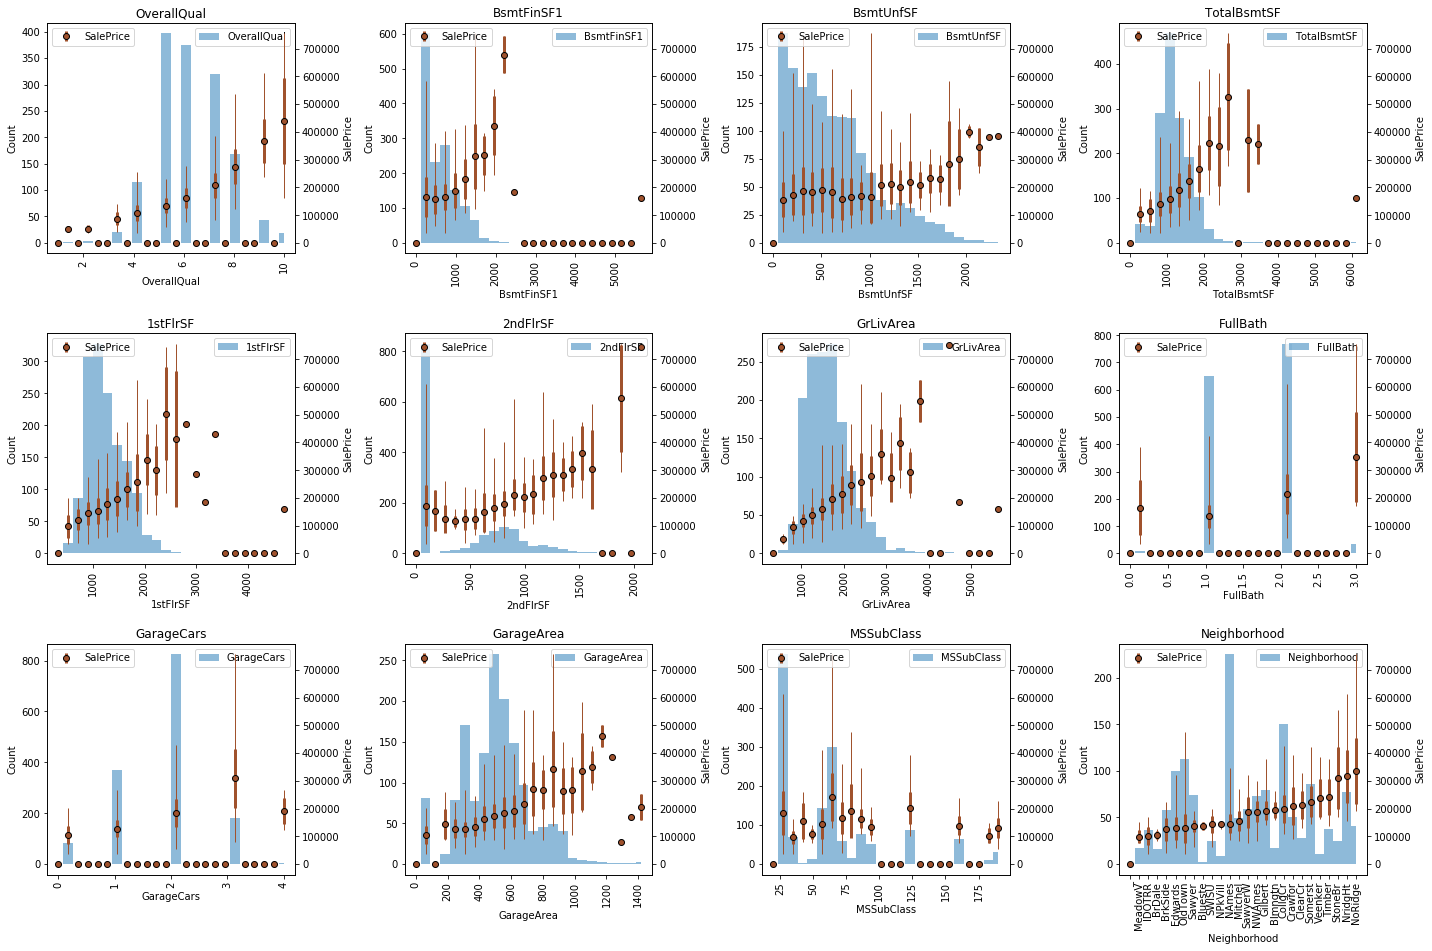

In [11]:

fields = numerical_fields + categorical_fields

plt.figure(figsize = (20, 90))
i = 1
for name in fields:
    plt.subplot(21, 4, i)
    plot_hist_with_target3(plt, df, name, 'SalePrice', histogram_bins = 'rice')
    i += 1
plt.tight_layout()

found 259 na in numerical field LotFrontage
found 1369 na in string field Alley
found 8 na in string field MasVnrType
found 8 na in numerical field MasVnrArea
found 37 na in string field BsmtQual
found 37 na in string field BsmtCond
found 38 na in string field BsmtExposure
found 37 na in string field BsmtFinType1
found 38 na in string field BsmtFinType2
found 1 na in string field Electrical
found 690 na in string field FireplaceQu
found 81 na in string field GarageType
found 81 na in numerical field GarageYrBlt
found 81 na in string field GarageFinish
found 81 na in string field GarageQual
found 81 na in string field GarageCond
found 1453 na in string field PoolQC
found 1179 na in string field Fence
found 1406 na in string field MiscFeature


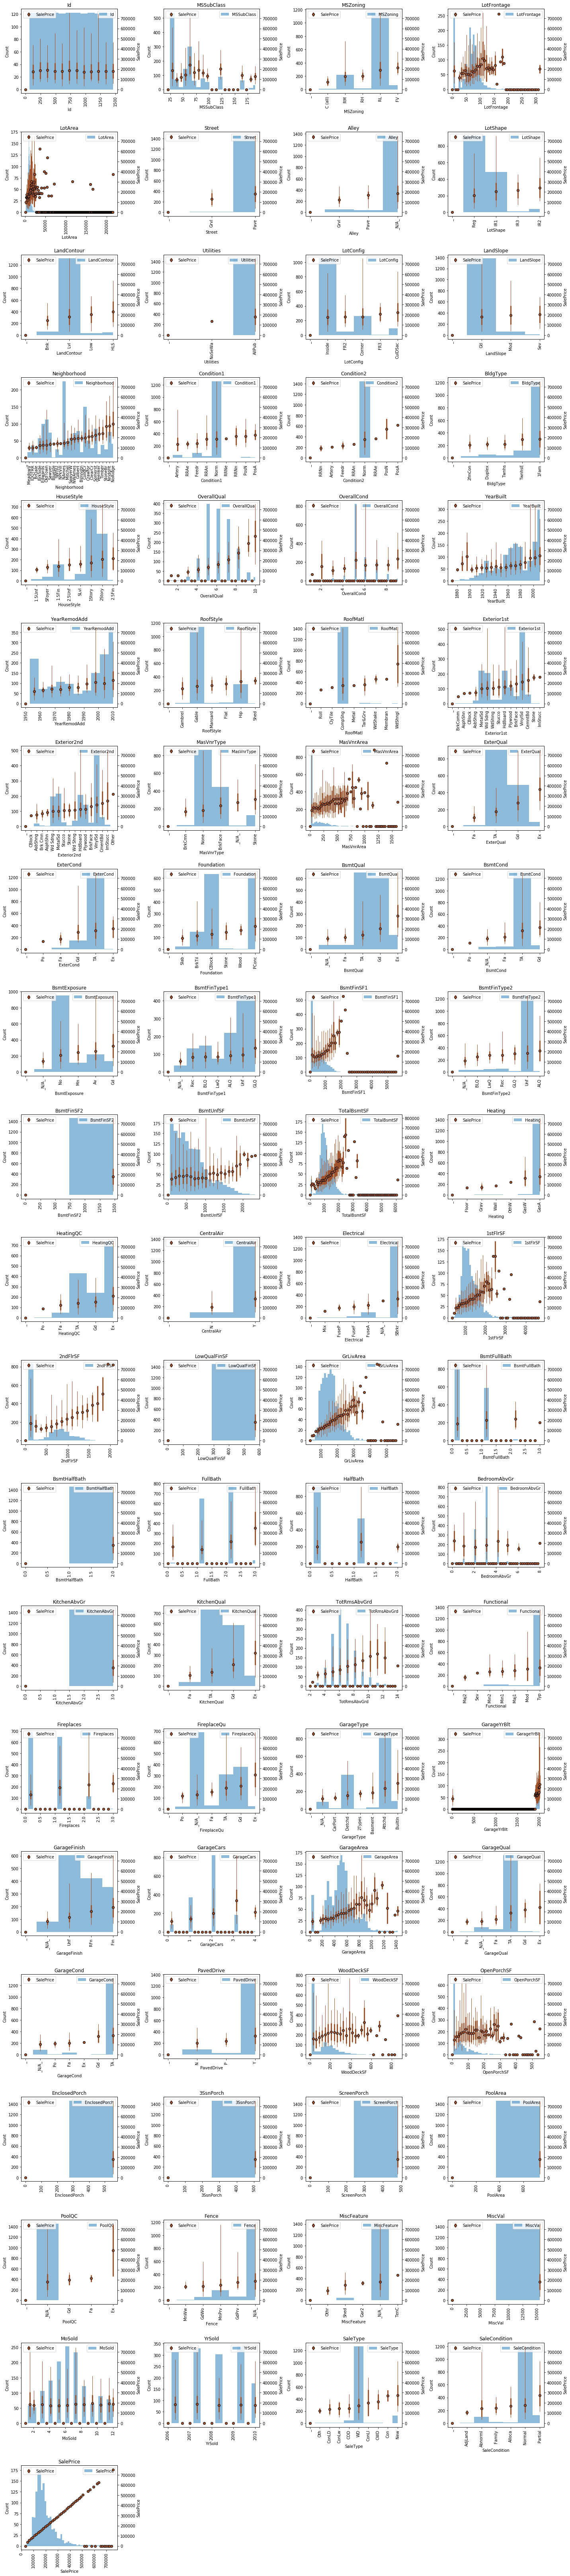

In [12]:
plt.figure(figsize = (20, 90))
i = 1
for name in df.keys():
    plt.subplot(21, 4, i)
    plot_hist_with_target3(plt, df, name, 'SalePrice', histogram_bins = 'fd')
    i += 1
plt.tight_layout()